<a href="https://colab.research.google.com/github/DDricko/Ciencia_de_dados_Ebac/blob/main/Mod_07_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score



In [2]:
df = pd.read_csv('demo01_tratada.csv')
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


In [4]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  bool   
 9   sexo_M                                  16650 non-null  bool   
 10  posse_de_veiculo_Y                      16650 non-null  bo

,0
qtd_filhos,0
idade,0
tempo_emprego,0
possui_celular,0
possui_fone_comercial,0
possui_fone,0
possui_email,0
qt_pessoas_residencia,0
mau,0
sexo_M,0


In [5]:
X = df.drop('mau', axis=1)
y = df['mau']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape


((11655, 28), (4995, 28))

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [11]:
modelo = DecisionTreeClassifier()

modelo.fit(X_train, y_train)


DecisionTreeClassifier()

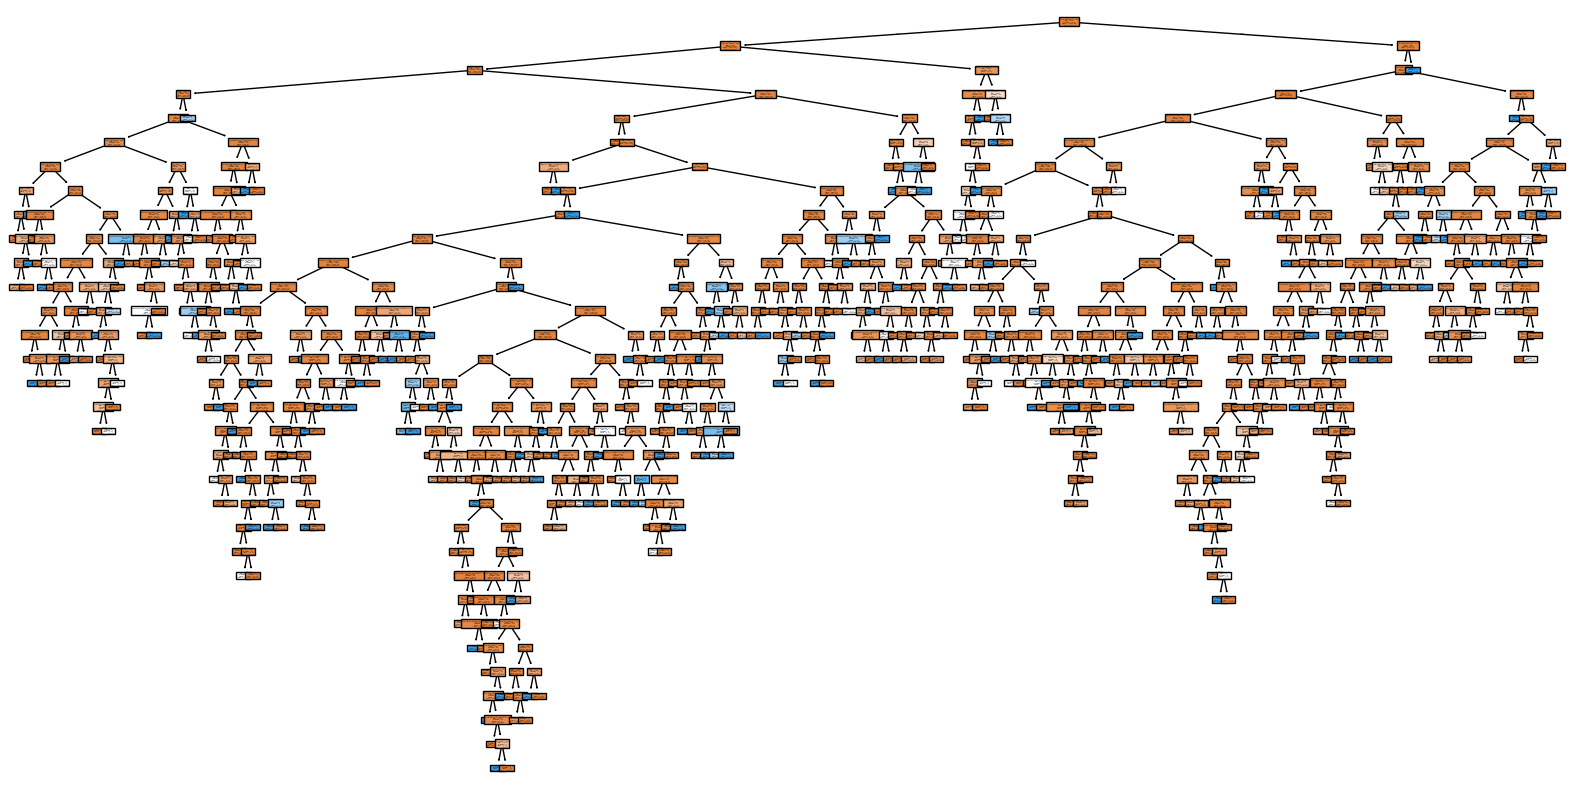

In [14]:

plt.figure(figsize=(20,10))
plot_tree(
    modelo,
    feature_names=X.columns,
    class_names=['aprovados', 'reprovados'],
    filled=True
)
plt.show()

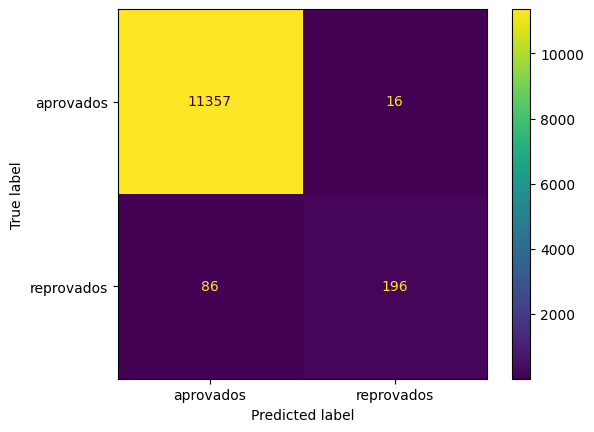

In [16]:
y_pred_train = modelo.predict(X_train)

cm = confusion_matrix(y_train, y_pred_train)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['aprovados', 'reprovados']
)

disp.plot()
plt.show()

In [18]:
accuracy_score(y_train, y_pred_train)


0.9912483912483913

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [19]:
y_pred_test = modelo.predict(X_test)


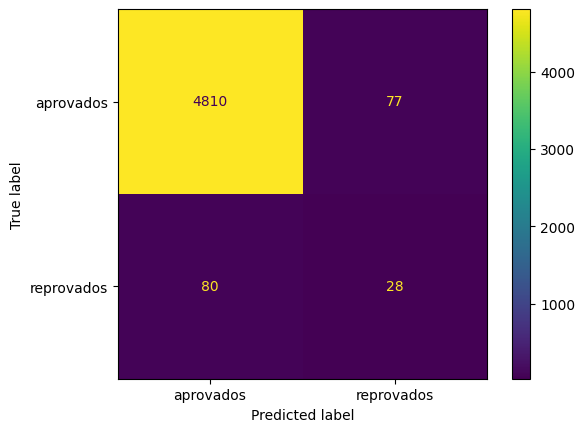

In [21]:

cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_test,
    display_labels=['aprovados', 'reprovados']
)

disp.plot()
plt.show()

In [22]:
accuracy_score(y_test, y_pred_test)


0.9685685685685685

In [23]:
modelo2 = DecisionTreeClassifier(
    min_samples_leaf=5,
    max_depth=10,
    random_state=123
)

modelo2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

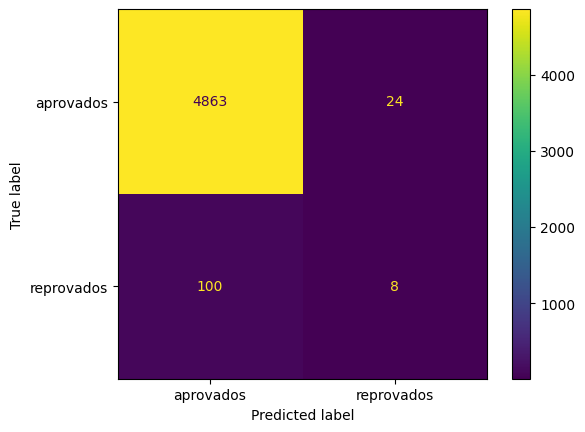

In [25]:
y_pred_test2 = modelo2.predict(X_test)

cm_test2 = confusion_matrix(y_test, y_pred_test2)

ConfusionMatrixDisplay(
    confusion_matrix=cm_test2,
    display_labels=['aprovados', 'reprovados']
).plot()

plt.show()

In [26]:
pd.Series(y_pred_test2).value_counts(normalize=True)


,proportion
False,0.993594
True,0.006406


In [27]:
baseline = (~y_test).mean()
baseline

np.float64(0.9783783783783784)

Apesar da alta acurácia, o modelo não supera o baseline, indicando que a base é desbalanceada e que a acurácia isoladamente não é uma boa métrica para avaliar o desempenho.